                      open   high     low  close   volume
datetime                                                 
2024-01-25 15:20:00  613.0  614.7  612.45  614.3  1355677
2024-01-25 15:25:00  614.3  617.0  613.20  615.0  1160681
Calculating 9 and 21 EMAs and it's crossovers
Bullish crossovers
Bearish crossovers


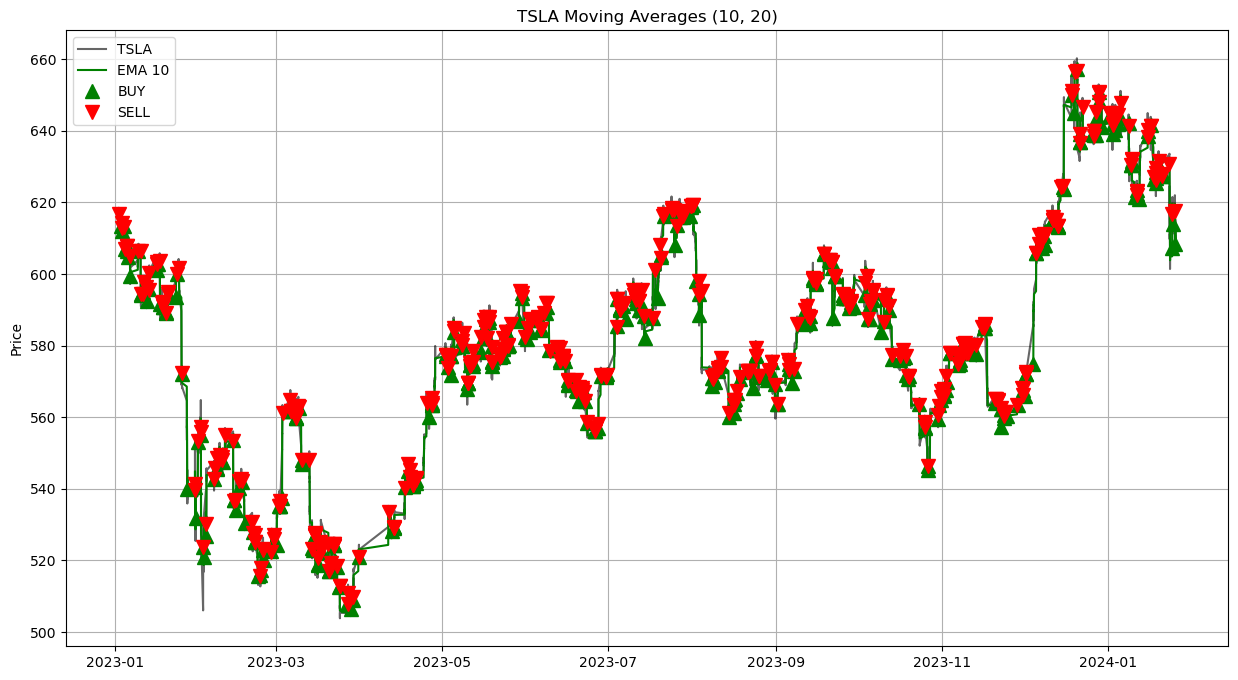

In [3]:
import pandas as pd
from finta import TA
import traceback2
from matplotlib import pyplot as plt

FILENAME="sbi_data.csv"
df = None

def calc_ema():
    global df
    print("Calculating 9 and 21 EMAs and it's crossovers")
    #print(df.tail(2))
    #print(df.shape)
    df['d_ema_10']=TA.EMA(df,9,"close")
    df['d_ema_20']=TA.EMA(df,21,"close")
    df['10_above_20'] = (df["d_ema_10"] >= df["d_ema_20"]).astype(int)
    df['10_20_co'] = df['10_above_20'].diff().astype('Int64')
    #print(df.tail(2))
    print("Bullish crossovers")
    #print(df.loc[df['10_20_co'] == 1])
    print("Bearish crossovers")
    #print(df.loc[df['10_20_co'] == -1])


def read_eod_data():
    global df
    try:
        df = pd.read_csv(FILENAME,parse_dates=['datetime'])
        df.set_index("datetime", inplace=True)
        print(df.tail(2))
        return True
    except Exception as e:
        print("Error reading data fromx CSV")
        print(e)
        print(traceback.format_exc())
        err_msg = "Internal error"
    return False

def plot_crossover():
    global df
    #plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.grid()
    plt.ylabel("Price")
    plt.plot(df['close'], label = 'TSLA', color = 'k',alpha = 0.6)
    plt.plot(df['d_ema_10'], label = 'EMA 10',color = 'g')
    plt.plot(df[df["10_20_co"] == 1].index, 
         df['d_ema_10'][df["10_20_co"] == 1], 
         "^", markersize = 10, color = 'g', label = 'BUY')
    
    plt.plot(df[df["10_20_co"] == -1].index, 
         df['d_ema_10'][df["10_20_co"] == -1], 
         "v", markersize = 10, color = 'r', label = 'SELL')

    plt.title('TSLA Moving Averages (10, 20)')
    plt.legend(loc = 'upper left')
    plt.show()


if __name__ == '__main__':
    if not read_eod_data():
        print("Error reading data")
    calc_ema()
    plot_crossover()